**Economic Analysis with Pandas**

In [1]:
!pip install fredapi

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


from fredapi import Fred
from google.colab import userdata

fred_key = userdata.get('fred-api')

# 1. create the fred object

In [6]:
fred = Fred(api_key=fred_key)

# 2. search for economic data


In [10]:
sp_search = fred.search('S&P', order_by='popularity')

In [11]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-07-23,2024-07-23,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-07-22,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-07-23 08:06:13-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-07-23,2024-07-23,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-06-25 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-07-23,2024-07-23,S&P 500,2014-07-23,2024-07-22,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-07-22 19:21:50-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-07-23,2024-07-23,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-07-23,2024-07-23,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-07-22,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-07-23 08:05:03-05:00,82,This data represents the effective yield of th...


# 3. pull raw data


In [13]:
sp500 = fred.get_series('SP500')

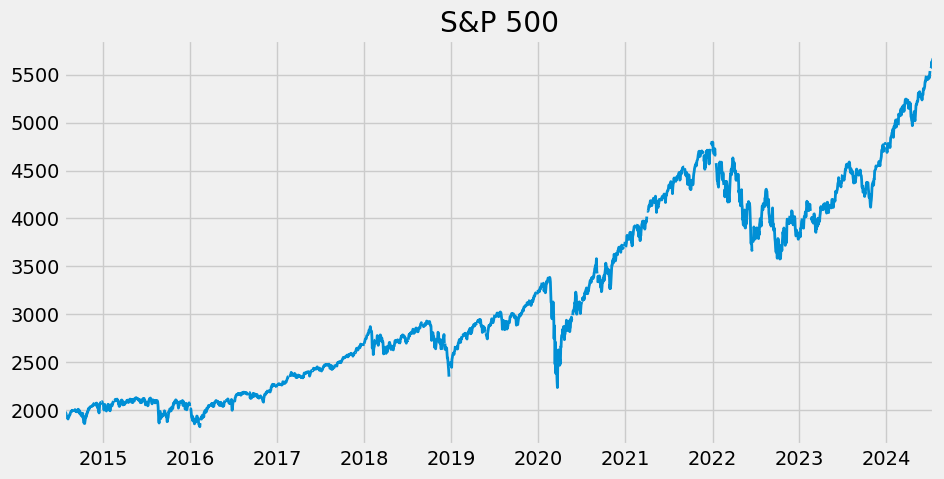

In [18]:
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

# 4. pull and join multiple data series

In [37]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')].shape

In [51]:
all_results = []

for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)


ValueError: Too Many Requests.  Exceeded Rate Limit

In [95]:
unemp_results = pd.concat(all_results, axis=1)

In [105]:
unemp_states = unemp_results.drop(['LNS14000006', 'U6RATE', 'M0892AUSM156SNBR', 'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'U2RATE', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'U4RATE', 'LNS14000001', 'LNS14027660', 'LNS14027662', 'LNS14024887', 'U1RATE', 'U5RATE', 'LRUN64TTUSM156S', 'LBSSA06', 'LNS14032183', 'LNS14000012', 'LNS14027659', 'LBSSA01', 'LASMT261982000000003', 'LBSSA36', 'LNS14000060', 'LNS14000028', 'LASMT391746000000003', 'LBSSA26',	'LBSSA28',	'LBSSA48',	'LBSSA12', 'LBSSA21',	'LNS14000018', 'LBSSA39',	'LNS13025703', 'LNS13023622', 'LBSSA55',	'LBSSA42',	'LNS14000036', 'LNS14000032', 'LBSSA25',	'LBSSA27',	'LBSSA47',	'LBSSA24',	'LBSSA54',	'LNS13023706',	'LBSSA13',	'LBSSA23',	'LBSSA17',	'LBSSA22',	'LBSSA08',	'LBSSA37',	'LBSSA45',	'LBSSA49',	'LBSSA51',	'LBSSA18',	'LBSSA29', 'LBSSA34',	'LNS14200000',	'LRUN24TTUSM156S',	'LBSSA19',	'LBSSA02',	'LBSSA53',	'LNS14027689',	'LBSSA04'], axis=1)

In [113]:
new_df = unemp_states.dropna()
new_df = new_df.drop(['UNRATE'], axis=1)

In [140]:
px.line(new_df)

# pull june 2024 unemployment rate per state





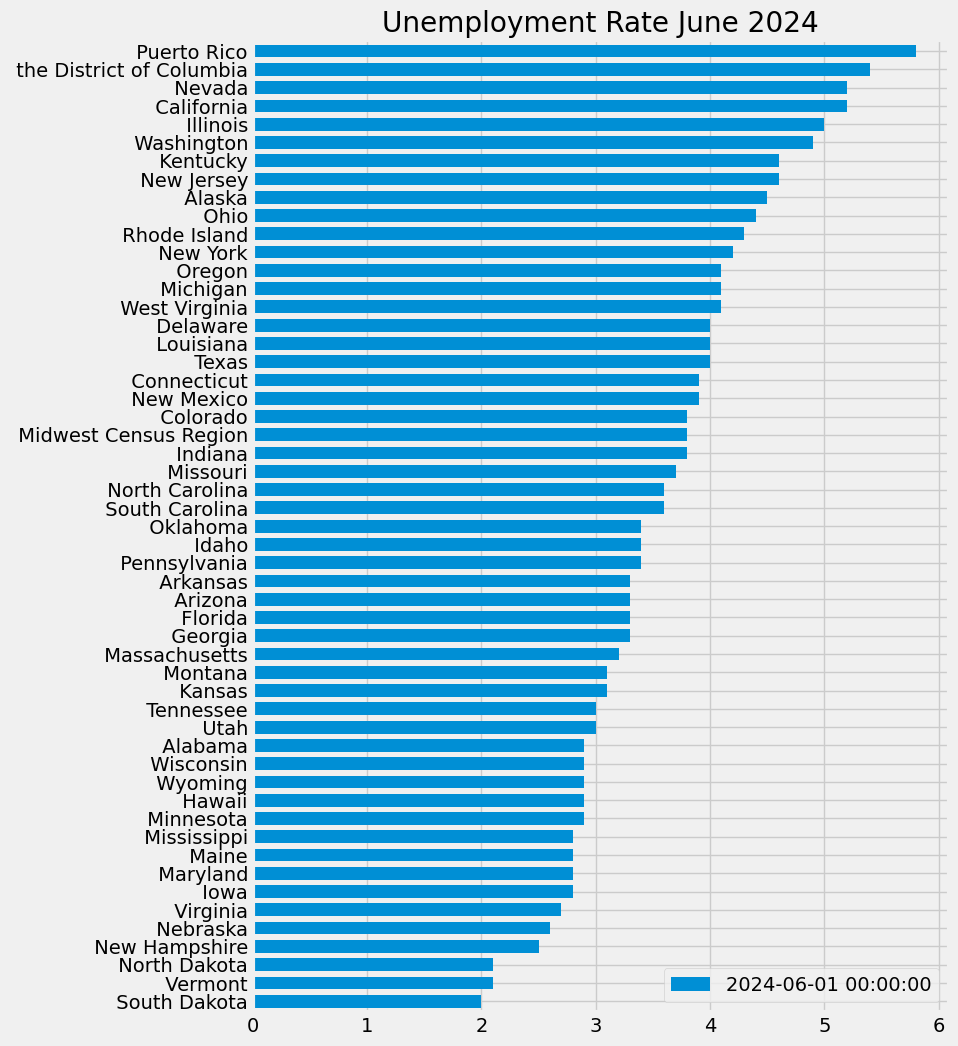

In [149]:
new_df.loc[new_df.index == '2024-06-01'].T \
  .sort_values('2024-06-01') \
  .plot(kind='barh', figsize=(8, 12), width=0.7, title='Unemployment Rate June 2024')
plt.show()

In [132]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()

In [137]:
new_df.columns = [id_to_state[c] for c in new_df.columns]